In [1]:
import os,sys,pandas,numpy,seaborn
import sklearn,sklearn.decomposition
import scipy,scipy.stats
import matplotlib,matplotlib.pyplot

matplotlib.rcParams.update({'font.size':18,'font.family':'Arial','xtick.labelsize':14,'ytick.labelsize':14,'axes.labelsize':18})
matplotlib.rcParams['pdf.fonttype']=42

In [2]:
def histogrammer(x):

    # get number of bins based on Rice's rule
    rice=int((len(x)**(1/3))*2)
    print('\t number of bins according to Rice: {}'.format(rice))

    counts,edges=numpy.histogram(x,bins=rice)
    half=(edges[1]-edges[0])/2
    centers=edges[:-1]+half

    return centers,counts

# 1. User defined variables

In [3]:
transcriptomics_file='/Volumes/omics4tb2/alomana/projects/uwm/results/transcriptomics/rld_HE.csv'
statistics_thp_file='/Volumes/omics4tb2/alomana/projects/uwm/results/transcriptomics/set_HE_thp.csv'
statistics_imac_file='/Volumes/omics4tb2/alomana/projects/uwm/results/transcriptomics/set_HE_imac.csv'
results_dir='/Volumes/omics4tb2/alomana/projects/uwm/results/transcriptomics/'

# 2. Read data

## 2.1. Read normalized counts

In [4]:
df=pandas.read_csv(transcriptomics_file,sep=',',index_col=0)
print(df.shape)
df.head()

(5530, 6)


,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2
ENSG00000225630,8.087192,8.041022,13.143323,14.015559,10.053757,9.997113
ENSG00000237973,10.638373,10.760765,9.871432,10.309640,12.593407,12.754937
ENSG00000248527,13.251173,13.388853,12.496437,13.121976,14.653392,14.374231
ENSG00000188976,11.231017,11.239112,11.914273,12.392524,11.328784,11.257082
ENSG00000188157,14.071582,14.092436,14.878889,14.082696,12.801721,12.467253


## 2.2. Read fold change and significance of THP1

In [5]:
statistics=pandas.read_csv(statistics_thp_file,sep=',',index_col=0)
print(statistics.shape)
print(statistics.head())
df['THP1_significance']=statistics['svalue']
df['log2FoldChange THP']=statistics['log2FoldChange']

print()
print(df.loc[statistics.index[0]])

df.head()

(5530, 4)
                    baseMean  log2FoldChange     lfcSE  svalue
ENSG00000173372  7481.337096       -8.403192  0.501789     0.0
ENSG00000173369  6086.922280       -9.581368  0.666194     0.0
ENSG00000169403  8736.439594       -6.745942  0.518991     0.0
ENSG00000188060  5156.936192       -8.575856  0.285981     0.0
ENSG00000159023  1875.953089       -3.189131  0.259462     0.0

HMDM.1                12.201022
HMDM.2                11.921673
THP1.1                 4.856467
THP1.2                 4.348269
iMac.1                14.367888
iMac.2                13.299584
THP1_significance      0.000000
log2FoldChange THP    -8.403192
Name: ENSG00000173372, dtype: float64


,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2,THP1_significance,log2FoldChange THP
ENSG00000225630,8.087192,8.041022,13.143323,14.015559,10.053757,9.997113,3.981058e-52,5.824565
ENSG00000237973,10.638373,10.760765,9.871432,10.309640,12.593407,12.754937,3.819475e-01,-0.599552
ENSG00000248527,13.251173,13.388853,12.496437,13.121976,14.653392,14.374231,3.774779e-01,-0.474808
ENSG00000188976,11.231017,11.239112,11.914273,12.392524,11.328784,11.257082,1.173146e-01,0.953627
ENSG00000188157,14.071582,14.092436,14.878889,14.082696,12.801721,12.467253,3.655132e-01,0.431284


## 2.3. Read fold change and significance of iMac

In [6]:
statistics=pandas.read_csv(statistics_imac_file,sep=',',index_col=0)
print(statistics.shape)
print(statistics.head())
df['iMac_significance']=statistics['svalue']
df['log2FoldChange iMac']=statistics['log2FoldChange']

print()
print(df.loc[statistics.index[0]])

df.head()

(5530, 4)
                    baseMean  log2FoldChange     lfcSE  svalue
ENSG00000079308  5292.203992       -5.059613  0.364034     0.0
ENSG00000173083  5420.563364       -4.948176  0.372640     0.0
ENSG00000170571  1961.730927       -4.547466  0.278577     0.0
ENSG00000206341  5766.458383       -2.858078  0.213192     0.0
ENSG00000137331  2369.553972       -5.823133  0.477921     0.0

HMDM.1                 13.548876
HMDM.2                 13.555865
THP1.1                 11.434189
THP1.2                 11.147884
iMac.1                  8.081287
iMac.2                  9.103430
THP1_significance       0.000013
log2FoldChange THP     -2.273935
iMac_significance       0.000000
log2FoldChange iMac    -5.059613
Name: ENSG00000079308, dtype: float64


,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2,THP1_significance,log2FoldChange THP,iMac_significance,log2FoldChange iMac
ENSG00000225630,8.087192,8.041022,13.143323,14.015559,10.053757,9.997113,3.981058e-52,5.824565,1.099943e-04,1.990318
ENSG00000237973,10.638373,10.760765,9.871432,10.309640,12.593407,12.754937,3.819475e-01,-0.599552,2.768396e-08,2.027838
ENSG00000248527,13.251173,13.388853,12.496437,13.121976,14.653392,14.374231,3.774779e-01,-0.474808,5.131007e-02,1.179112
ENSG00000188976,11.231017,11.239112,11.914273,12.392524,11.328784,11.257082,1.173146e-01,0.953627,8.130255e-01,0.055836
ENSG00000188157,14.071582,14.092436,14.878889,14.082696,12.801721,12.467253,3.655132e-01,0.431284,1.630278e-02,-1.430541


# 3. Variable exploration

In [7]:
df['HMDM_mean']=df.loc[:,['HMDM.1','HMDM.2']].mean(axis=1)
df['THP1_mean']=df.loc[:,['THP1.1','THP1.2']].mean(axis=1)
df['iMac_mean']=df.loc[:,['iMac.1','iMac.2']].mean(axis=1)
df['Mean']=df.loc[:,['HMDM_mean','THP1_mean','iMac_mean']].mean(axis=1)
df['STD']=df.loc[:,['HMDM_mean','THP1_mean','iMac_mean']].std(axis=1)
df['CV']=df['STD']/df['Mean']
df.head()

,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2,THP1_significance,log2FoldChange THP,iMac_significance,log2FoldChange iMac,HMDM_mean,THP1_mean,iMac_mean,Mean,STD,CV
ENSG00000225630,8.087192,8.041022,13.143323,14.015559,10.053757,9.997113,3.981058e-52,5.824565,1.099943e-04,1.990318,8.064107,13.579441,10.025435,10.556328,2.795731,0.264839
ENSG00000237973,10.638373,10.760765,9.871432,10.309640,12.593407,12.754937,3.819475e-01,-0.599552,2.768396e-08,2.027838,10.699569,10.090536,12.674172,11.154759,1.350627,0.121081
ENSG00000248527,13.251173,13.388853,12.496437,13.121976,14.653392,14.374231,3.774779e-01,-0.474808,5.131007e-02,1.179112,13.320013,12.809206,14.513812,13.547677,0.874810,0.064573
ENSG00000188976,11.231017,11.239112,11.914273,12.392524,11.328784,11.257082,1.173146e-01,0.953627,8.130255e-01,0.055836,11.235064,12.153399,11.292933,11.560465,0.514310,0.044489
ENSG00000188157,14.071582,14.092436,14.878889,14.082696,12.801721,12.467253,3.655132e-01,0.431284,1.630278e-02,-1.430541,14.082009,14.480793,12.634487,13.732430,0.971527,0.070747


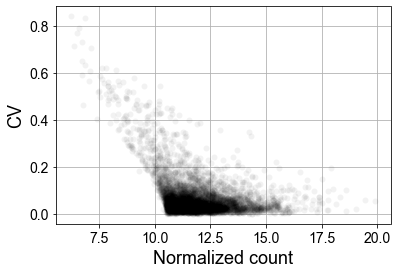

In [8]:
matplotlib.pyplot.plot(df['Mean'],df['CV'],'ok',alpha=0.05,mew=0)
matplotlib.pyplot.xlabel('Normalized count')
matplotlib.pyplot.ylabel('CV')
matplotlib.pyplot.grid()

# 4. Visualization

In [9]:
df['HMDM_zscore']=(df['HMDM_mean']-df['Mean'])/df['STD']
df['THP1_zscore']=(df['THP1_mean']-df['Mean'])/df['STD']
df['iMac_zscore']=(df['iMac_mean']-df['Mean'])/df['STD']
df.head()

,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2,THP1_significance,log2FoldChange THP,iMac_significance,log2FoldChange iMac,HMDM_mean,THP1_mean,iMac_mean,Mean,STD,CV,HMDM_zscore,THP1_zscore,iMac_zscore
ENSG00000225630,8.087192,8.041022,13.143323,14.015559,10.053757,9.997113,3.981058e-52,5.824565,1.099943e-04,1.990318,8.064107,13.579441,10.025435,10.556328,2.795731,0.264839,-0.891438,1.081332,-0.189894
ENSG00000237973,10.638373,10.760765,9.871432,10.309640,12.593407,12.754937,3.819475e-01,-0.599552,2.768396e-08,2.027838,10.699569,10.090536,12.674172,11.154759,1.350627,0.121081,-0.337021,-0.787948,1.124969
ENSG00000248527,13.251173,13.388853,12.496437,13.121976,14.653392,14.374231,3.774779e-01,-0.474808,5.131007e-02,1.179112,13.320013,12.809206,14.513812,13.547677,0.874810,0.064573,-0.260244,-0.844149,1.104393
ENSG00000188976,11.231017,11.239112,11.914273,12.392524,11.328784,11.257082,1.173146e-01,0.953627,8.130255e-01,0.055836,11.235064,12.153399,11.292933,11.560465,0.514310,0.044489,-0.632695,1.152872,-0.520177
ENSG00000188157,14.071582,14.092436,14.878889,14.082696,12.801721,12.467253,3.655132e-01,0.431284,1.630278e-02,-1.430541,14.082009,14.480793,12.634487,13.732430,0.971527,0.070747,0.359825,0.770295,-1.130120


In [10]:
pca=sklearn.decomposition.PCA(n_components=2)
principalComponents=pca.fit_transform(df.loc[:,['HMDM_zscore','THP1_zscore','iMac_zscore']].T)
principalDf=pandas.DataFrame(data=principalComponents,columns=['PC1','PC2'])
principalDf.head()

,PC1,PC2
0,-36.706195,-42.014495
1,70.315647,-1.251941
2,-33.609452,43.266436


In [11]:
explained=pca.explained_variance_ratio_
print(explained)

[0.67099732 0.32900268]


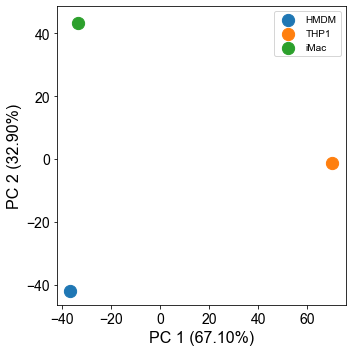

In [12]:
fig = matplotlib.pyplot.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1 ({:.2f}%)'.format(explained[0]*100),fontsize=16)
ax.set_ylabel('PC 2 ({:.2f}%)'.format(explained[1]*100),fontsize=16)
labels=['HMDM','THP1','iMac']
for i in range(3):
    ax.scatter(principalDf['PC1'][i],principalDf['PC2'][i],s=150,label=labels[i])
matplotlib.pyplot.legend()
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('{}/figures/pca_all_proteins_HE.pdf'.format(results_dir))

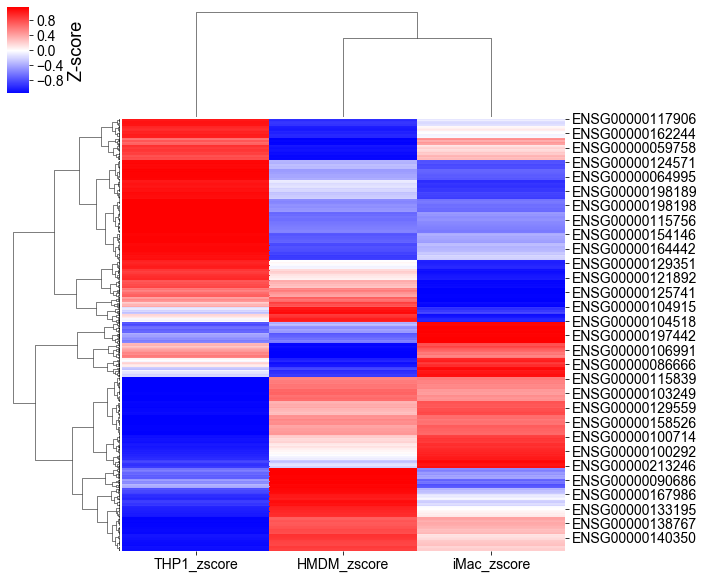

In [13]:
g=seaborn.clustermap(df.loc[:,['HMDM_zscore','THP1_zscore','iMac_zscore']],cmap='bwr',cbar_kws={'label': 'Z-score'})
matplotlib.pyplot.savefig('{}/figures/heatmap_all_proteins_zscore_HE.pdf'.format(results_dir),bbox_inches='tight')

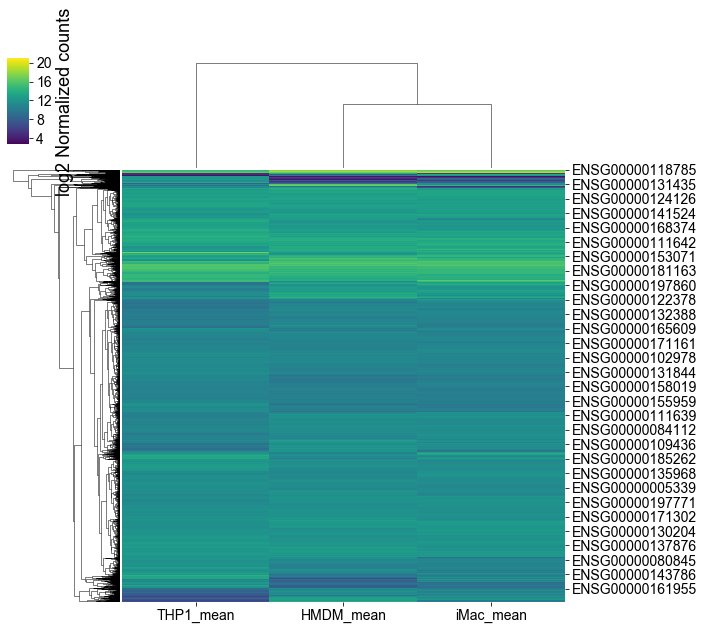

In [14]:
g=seaborn.clustermap(df.loc[:,['HMDM_mean','THP1_mean','iMac_mean']],cmap='viridis',cbar_kws={'label': 'log2 Normalized counts'})
matplotlib.pyplot.savefig('{}/figures/heatmap_all_proteins_abundance_HE.pdf'.format(results_dir),bbox_inches='tight')

# 5. Quantification

## 5.1. Correlation

Text(0.5, 0, 'log2 Normalized count')

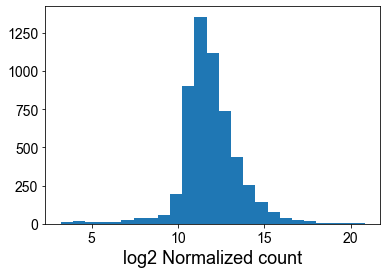

In [15]:
df['HMDM_mean'].hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 Normalized count')

Text(0.5, 0, 'log2 Normalized count')

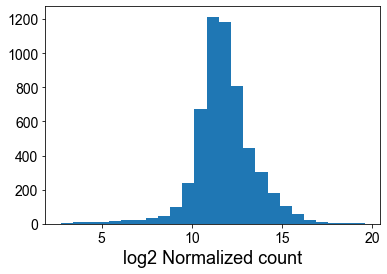

In [16]:
df['THP1_mean'].hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 Normalized count')

Text(0.5, 0, 'log2 Normalized count')

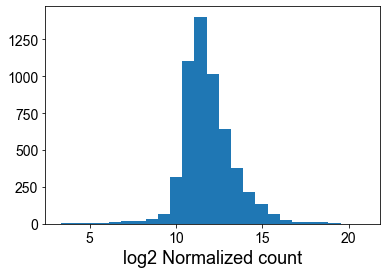

In [17]:
df['iMac_mean'].hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 Normalized count')

,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2
HMDM.1,1.000000,0.984404,0.393316,0.383241,0.740310,0.778530
HMDM.2,0.984404,1.000000,0.410849,0.402349,0.778440,0.787896
THP1.1,0.393316,0.410849,1.000000,0.936480,0.510315,0.457429
THP1.2,0.383241,0.402349,0.936480,1.000000,0.490991,0.430557
iMac.1,0.740310,0.778440,0.510315,0.490991,1.000000,0.917635
iMac.2,0.778530,0.787896,0.457429,0.430557,0.917635,1.000000


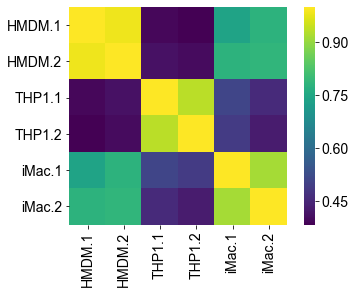

In [18]:
samples=['HMDM.1','HMDM.2','THP1.1','THP1.2','iMac.1','iMac.2']
pearson=df.corr(method='pearson').loc[samples,samples]

seaborn.heatmap(pearson,cmap='viridis',square=True)
pearson

,HMDM_mean,THP1_mean,iMac_mean
HMDM_mean,1.000000,0.405367,0.790578
THP1_mean,0.405367,1.000000,0.490356
iMac_mean,0.790578,0.490356,1.000000


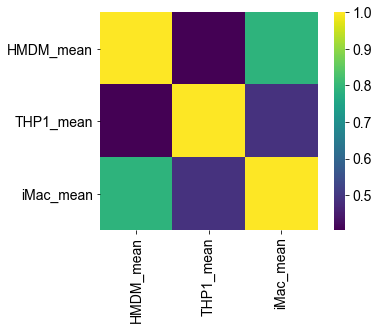

In [19]:
samples=['HMDM_mean','THP1_mean','iMac_mean']
pearson=df.corr(method='pearson').loc[samples,samples]

seaborn.heatmap(pearson,cmap='viridis',square=True)
pearson

,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2
HMDM.1,1.000000,0.881627,0.344865,0.315501,0.559419,0.623502
HMDM.2,0.881627,1.000000,0.343577,0.320865,0.601318,0.622544
THP1.1,0.344865,0.343577,1.000000,0.760197,0.372371,0.355333
THP1.2,0.315501,0.320865,0.760197,1.000000,0.359403,0.327641
iMac.1,0.559419,0.601318,0.372371,0.359403,1.000000,0.738919
iMac.2,0.623502,0.622544,0.355333,0.327641,0.738919,1.000000


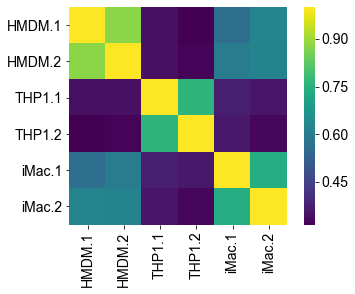

In [20]:
samples=['HMDM.1','HMDM.2','THP1.1','THP1.2','iMac.1','iMac.2']
kendall=df.corr(method='kendall').loc[samples,samples]

seaborn.heatmap(kendall,cmap='viridis',square=True)
kendall

,HMDM_mean,THP1_mean,iMac_mean
HMDM_mean,1.000000,0.336118,0.622755
THP1_mean,0.336118,1.000000,0.363120
iMac_mean,0.622755,0.363120,1.000000


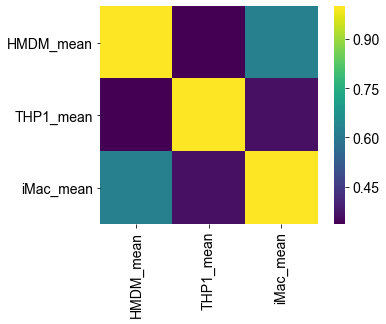

In [21]:
samples=['HMDM_mean','THP1_mean','iMac_mean']
kendall=df.corr(method='kendall').loc[samples,samples]

seaborn.heatmap(kendall,cmap='viridis',square=True)
kendall

,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2
HMDM.1,1.000000,0.977681,0.475614,0.443736,0.722115,0.783553
HMDM.2,0.977681,1.000000,0.475603,0.451004,0.761033,0.783290
THP1.1,0.475614,0.475603,1.000000,0.908832,0.518050,0.494838
THP1.2,0.443736,0.451004,0.908832,1.000000,0.502627,0.462131
iMac.1,0.722115,0.761033,0.518050,0.502627,1.000000,0.889326
iMac.2,0.783553,0.783290,0.494838,0.462131,0.889326,1.000000


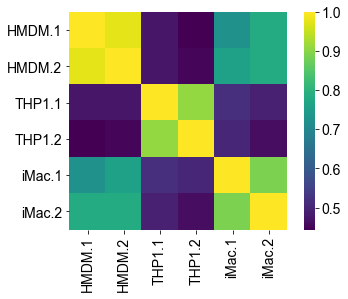

In [22]:
samples=['HMDM.1','HMDM.2','THP1.1','THP1.2','iMac.1','iMac.2']
spearman=df.corr(method='spearman').loc[samples,samples]

seaborn.heatmap(spearman,cmap='viridis',square=True)
spearman

,HMDM_mean,THP1_mean,iMac_mean
HMDM_mean,1.000000,0.469388,0.783809
THP1_mean,0.469388,1.000000,0.509251
iMac_mean,0.783809,0.509251,1.000000


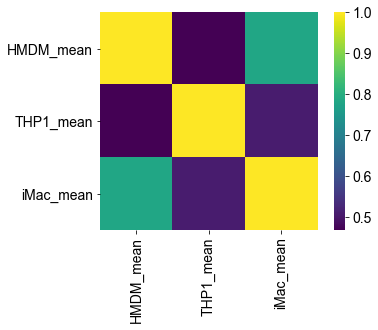

In [23]:
samples=['HMDM_mean','THP1_mean','iMac_mean']
spearman=df.corr(method='spearman').loc[samples,samples]

seaborn.heatmap(spearman,cmap='viridis',square=True)
spearman

## 5.2. Histogram of fold-change

Text(0.5, 0, 'log2 FC')

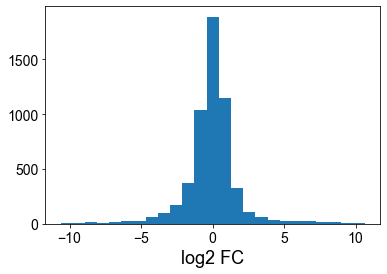

In [24]:
df['log2FoldChange THP'].hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 FC')

Text(0.5, 0, 'log2 FC')

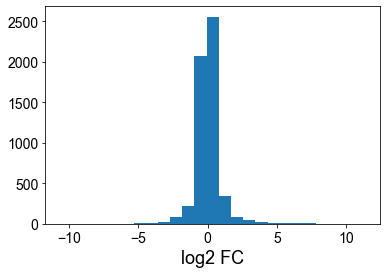

In [25]:
df['log2FoldChange iMac'].hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 FC')

	 number of bins according to Rice: 35
	 number of bins according to Rice: 35


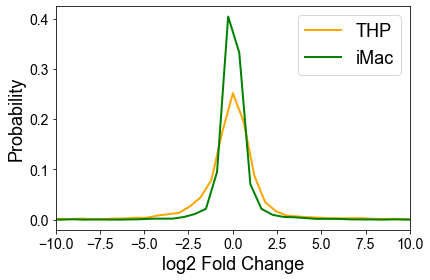

In [26]:
centersA,counts=histogrammer(df['log2FoldChange THP'].tolist())
matplotlib.pyplot.plot(centersA,counts/sum(counts),'-',color='orange',lw=2,label='THP')

centersB,counts=histogrammer(df['log2FoldChange iMac'].tolist())
matplotlib.pyplot.plot(centersB,counts/sum(counts),'-',color='green',lw=2,label='iMac')

matplotlib.pyplot.xlim(-10,10)
matplotlib.pyplot.xlabel('log2 Fold Change')
matplotlib.pyplot.ylabel('Probability')
matplotlib.pyplot.legend(fontsize=18)
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.savefig('{}/figures/fold_change_probabilities_HE.pdf'.format(results_dir))

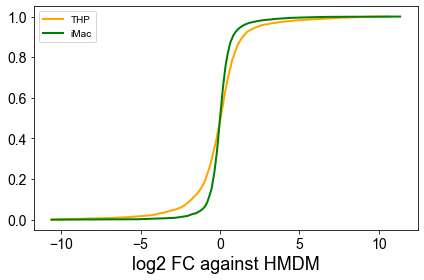

In [27]:
# kolmogorov test of fold change
x=numpy.sort(df['log2FoldChange THP'].tolist())
y=numpy.arange(x.shape[0])/x.shape[0]
matplotlib.pyplot.plot(x,y,'-',color='orange',lw=2,label='THP')

x=numpy.sort(df['log2FoldChange iMac'].tolist())
y=numpy.arange(x.shape[0])/x.shape[0]
matplotlib.pyplot.plot(x,y,'-',color='green',lw=2,label='iMac')

matplotlib.pyplot.legend()
matplotlib.pyplot.xlabel('log2 FC against HMDM')
matplotlib.pyplot.tight_layout()

In [28]:
scipy.stats.ks_2samp(df['log2FoldChange THP'].tolist(),df['log2FoldChange iMac'].tolist())

Ks_2sampResult(statistic=0.14321880650994576, pvalue=7.4818649187941e-50)

## 5.3. Dot plot

In [29]:
df.head()

,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2,THP1_significance,log2FoldChange THP,iMac_significance,log2FoldChange iMac,HMDM_mean,THP1_mean,iMac_mean,Mean,STD,CV,HMDM_zscore,THP1_zscore,iMac_zscore
ENSG00000225630,8.087192,8.041022,13.143323,14.015559,10.053757,9.997113,3.981058e-52,5.824565,1.099943e-04,1.990318,8.064107,13.579441,10.025435,10.556328,2.795731,0.264839,-0.891438,1.081332,-0.189894
ENSG00000237973,10.638373,10.760765,9.871432,10.309640,12.593407,12.754937,3.819475e-01,-0.599552,2.768396e-08,2.027838,10.699569,10.090536,12.674172,11.154759,1.350627,0.121081,-0.337021,-0.787948,1.124969
ENSG00000248527,13.251173,13.388853,12.496437,13.121976,14.653392,14.374231,3.774779e-01,-0.474808,5.131007e-02,1.179112,13.320013,12.809206,14.513812,13.547677,0.874810,0.064573,-0.260244,-0.844149,1.104393
ENSG00000188976,11.231017,11.239112,11.914273,12.392524,11.328784,11.257082,1.173146e-01,0.953627,8.130255e-01,0.055836,11.235064,12.153399,11.292933,11.560465,0.514310,0.044489,-0.632695,1.152872,-0.520177
ENSG00000188157,14.071582,14.092436,14.878889,14.082696,12.801721,12.467253,3.655132e-01,0.431284,1.630278e-02,-1.430541,14.082009,14.480793,12.634487,13.732430,0.971527,0.070747,0.359825,0.770295,-1.130120


THP up: 778
THP down: 918
iMac up: 311
iMac down: 255


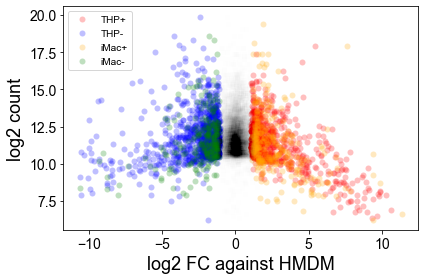

In [30]:
new=df.loc[(df['THP1_significance'] < 0.05) & (df['log2FoldChange THP'] > 1)]
matplotlib.pyplot.plot(new['log2FoldChange THP'],new['Mean'],'o',color='red',label='THP+',alpha=0.25,mew=0)
print('THP up: {}'.format(new.shape[0]))

new=df.loc[(df['THP1_significance'] < 0.05) & (df['log2FoldChange THP'] < -1)]
matplotlib.pyplot.plot(new['log2FoldChange THP'],new['Mean'],'o',color='blue',label='THP-',alpha=0.25,mew=0)
print('THP down: {}'.format(new.shape[0]))

new=df.loc[(df['iMac_significance'] < 0.05) & (df['log2FoldChange iMac'] > 1)]
matplotlib.pyplot.plot(new['log2FoldChange iMac'],new['Mean'],'o',color='orange',label='iMac+',alpha=0.25,mew=0)
print('iMac up: {}'.format(new.shape[0]))

new=df.loc[(df['iMac_significance'] < 0.05) & (df['log2FoldChange iMac'] < -1)]
matplotlib.pyplot.plot(new['log2FoldChange iMac'],new['Mean'],'o',color='green',label='iMac-',alpha=0.25,mew=0)
print('iMac down: {}'.format(new.shape[0]))

new=df.loc[(df['THP1_significance'] > 0.05)]
matplotlib.pyplot.plot(new['log2FoldChange THP'],new['Mean'],'o',color='black',alpha=0.005,mew=0)

new=df.loc[(df['iMac_significance'] > 0.05)]
matplotlib.pyplot.plot(new['log2FoldChange iMac'],new['Mean'],'o',color='black',alpha=0.005,mew=0)

matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.xlabel('log2 FC against HMDM')
matplotlib.pyplot.ylabel('log2 count')
matplotlib.pyplot.tight_layout()

## 5.4. Scatter FC

In [31]:
print(df.shape)
thp_genes=df.loc[(df['THP1_significance'] < 0.05)].index.to_list()
print('THP DETs',len(thp_genes))
imac_genes=df.loc[(df['iMac_significance'] < 0.05)].index.to_list()
print('iMac DETs',len(imac_genes))

print()
genes=list(set(thp_genes) | set(imac_genes))
print('intersect DETs',len(genes))

(5530, 19)
THP DETs 1696
iMac DETs 566

intersect DETs 1868


In [32]:
new=df.loc[genes]
print(new.shape)
new.head()

(1868, 19)


,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2,THP1_significance,log2FoldChange THP,iMac_significance,log2FoldChange iMac,HMDM_mean,THP1_mean,iMac_mean,Mean,STD,CV,HMDM_zscore,THP1_zscore,iMac_zscore
ENSG00000164125,12.620236,12.444866,8.842775,10.034908,12.695274,13.180272,3.949689e-08,-3.028061,5.414843e-01,0.327086,12.532551,9.438842,12.937773,11.636389,1.913886,0.164474,0.468242,-1.148212,0.679970
ENSG00000152223,11.710839,11.661078,10.064880,9.376519,10.998644,11.634027,1.504058e-04,-1.943048,6.351775e-01,-0.285907,11.685959,9.720699,11.316335,10.907665,1.044423,0.095751,0.745190,-1.136479,0.391289
ENSG00000180964,10.333441,10.561198,10.303588,10.709673,11.881820,11.420389,5.557339e-01,0.069182,3.775985e-02,1.206800,10.447319,10.506630,11.651104,10.868351,0.678532,0.062432,-0.620504,-0.533093,1.153597
ENSG00000102471,6.117214,7.365131,12.215278,11.839407,10.503300,10.538432,1.165499e-27,5.413748,1.548597e-12,3.797567,6.741173,12.027342,10.520866,9.763127,2.723330,0.278940,-1.109654,0.831414,0.278240
ENSG00000198113,12.100369,11.993868,13.465687,13.283953,12.206976,12.236536,1.828577e-04,1.385610,8.366143e-01,0.175373,12.047119,13.374820,12.221756,12.547898,0.721439,0.057495,-0.694140,1.146212,-0.452072


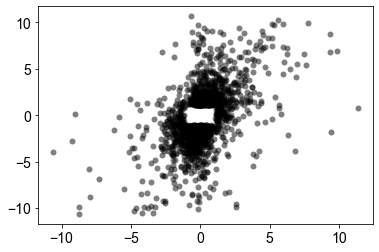

In [33]:
matplotlib.pyplot.plot(new['log2FoldChange iMac'],new['log2FoldChange THP'],'o',color='black',alpha=0.5,mew=0)

iMAC THP
UP UP maroon 189
DOWN DOWN indigo 154
DOWN UP magenta 20
UP DOWN cyan 31
UP — orange 82
DOWN — green 61
— UP red 530
— DOWN blue 680
— — black 0


/Users/alomana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


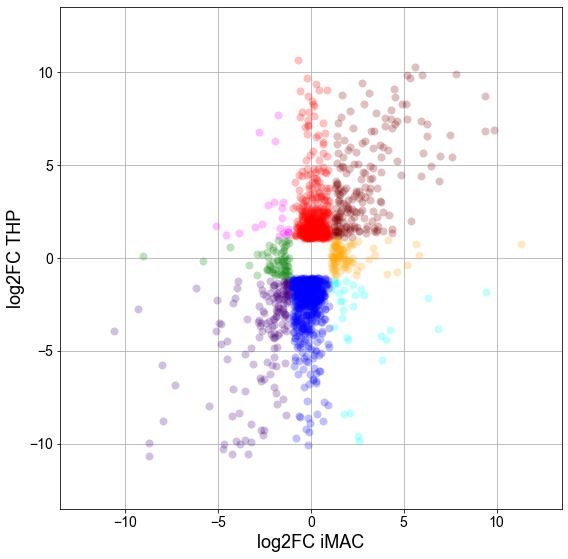

In [34]:
print('iMAC THP')
matplotlib.pyplot.figure(None,(8,8))
the_ms=8

theColor='maroon'
x=new.loc[(new['log2FoldChange iMac'] > 1) & (new['log2FoldChange THP'] > 1) & (new['iMac_significance'] < 0.05) & (new['THP1_significance'] < 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('UP UP',theColor,x.shape[0])
x.to_csv('{}tables/HE_{}.txt'.format(results_dir,theColor),sep='\t')

theColor='indigo'
x=new.loc[(new['log2FoldChange iMac'] < -1) & (new['log2FoldChange THP'] < -1) & (new['iMac_significance'] < 0.05) & (new['THP1_significance'] < 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('DOWN DOWN',theColor,x.shape[0])
x.to_csv('{}tables/HE_{}.txt'.format(results_dir,theColor),sep='\t')

theColor='magenta'
x=new.loc[(new['log2FoldChange iMac'] < -1) & (new['log2FoldChange THP'] > 1) & (new['iMac_significance'] < 0.05) & (new['THP1_significance'] < 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('DOWN UP',theColor,x.shape[0])
x.to_csv('{}tables/HE_{}.txt'.format(results_dir,theColor),sep='\t')

theColor='cyan'
x=new.loc[(new['log2FoldChange iMac'] > 1) & (new['log2FoldChange THP'] < -1) & (new['iMac_significance'] < 0.05) & (new['THP1_significance'] < 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('UP DOWN',theColor,x.shape[0])
x.to_csv('{}tables/HE_{}.txt'.format(results_dir,theColor),sep='\t')

theColor='orange'
x=new.loc[(new['log2FoldChange iMac'] > 1) & (new['log2FoldChange THP'] < 1) & (new['log2FoldChange THP'] > -1) & (new['iMac_significance'] < 0.05) & (new['THP1_significance'] > 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('UP —',theColor,x.shape[0])
x.to_csv('{}tables/HE_{}.txt'.format(results_dir,theColor),sep='\t')

theColor='green'
x=new.loc[(new['log2FoldChange iMac'] < -1) & (new['log2FoldChange THP'] < 1) & (new['log2FoldChange THP'] > -1) & (new['iMac_significance'] < 0.05) & (new['THP1_significance'] > 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('DOWN —',theColor,x.shape[0])
x.to_csv('{}tables/HE_{}.txt'.format(results_dir,theColor),sep='\t')

theColor='red'
x=new.loc[(new['log2FoldChange THP'] > 1) & (new['log2FoldChange iMac'] < 1) & (new['log2FoldChange iMac'] > -1) & (new['iMac_significance'] > 0.05) & (new['THP1_significance'] < 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('— UP',theColor,x.shape[0])
x.to_csv('{}tables/HE_{}.txt'.format(results_dir,theColor),sep='\t')

theColor='blue'
x=new.loc[(new['log2FoldChange THP'] < -1) & (new['log2FoldChange iMac'] < 1) & (new['log2FoldChange iMac'] > -1) & (new['iMac_significance'] > 0.05) & (new['THP1_significance'] < 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('— DOWN',theColor,x.shape[0])
x.to_csv('{}tables/HE_{}.txt'.format(results_dir,theColor),sep='\t')

theColor='black'
x=new.loc[(new['log2FoldChange THP'] < 1) & (new['log2FoldChange THP'] > -1) & (new['log2FoldChange iMac'] < 1) & (new['log2FoldChange iMac'] > -1)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('— —',theColor,x.shape[0])
x.to_csv('{}tables/HE_{}.txt'.format(results_dir,theColor),sep='\t')

matplotlib.pyplot.xlabel('log2FC iMAC')
matplotlib.pyplot.ylabel('log2FC THP')

matplotlib.pyplot.grid()
matplotlib.pyplot.xlim(-13.5,13.5)
matplotlib.pyplot.ylim([-13.5,13.5])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.axes().set_aspect('equal')
matplotlib.pyplot.savefig('{}/figures/transcript_trends_HE.pdf'.format(results_dir))

In [ ]:
# ratio is 8.46